In [24]:
import os
os.chdir("D:/Projects-Global-Logic/Video-PoC/PlantVillage/PlantVillage")
os.getcwd()



'D:\\Projects-Global-Logic\\Video-PoC\\PlantVillage\\PlantVillage'

In [25]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [26]:
mapping = pd.read_csv('mapping.csv')
mappingval = pd.read_csv('val.csv')
mapping=mapping[:1000]
print(mapping.head() )
mappingval=mappingval[:200]
print(mappingval.head() )


            

                  Class                                           Image_ID
0  Strawberry___healthy  8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1...
1  Strawberry___healthy  b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4...
2  Strawberry___healthy  abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1...
3  Strawberry___healthy  3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1...
4  Strawberry___healthy  4005fb13-0d7c-4a30-9ee3-73e9e4cee05e___RS_HL 1...
                  Class                                           Image_ID
0  Strawberry___healthy  d1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2...
1  Strawberry___healthy  29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4...
2  Strawberry___healthy  33d585b6-736d-4767-9004-2444f4916fd9___RS_HL 4...
3  Strawberry___healthy  aa47a5b4-789e-43ff-acd0-70bef9f8a365___RS_HL 4...
4  Strawberry___healthy  d454c3f8-ca2e-4935-9c09-3b6a480ac097___RS_HL 1...


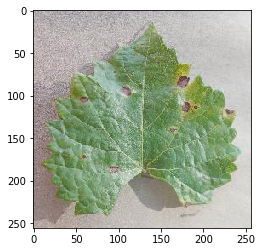

In [27]:
X = [ ]     # creating an empty array
for index, row in mapping.iterrows():
    img = plt.imread('D:/Projects-Global-Logic/Video-PoC/PlantVillage/PlantVillage/train/' + row.Class+'/'+ row.Image_ID)
    X.append(img)  # storing each image in array X
    
X = np.array(X)    # converting list to array
plt.imshow(img)

In [28]:
y = mapping.Class
dummy_y  = pd.get_dummies(y)
print(dummy_y.head())
print(dummy_y.shape)

   Grape___Black_rot  Strawberry___healthy
0                  0                     1
1                  0                     1
2                  0                     1
3                  0                     1
4                  0                     1
(1000, 2)


In [29]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)


In [30]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [31]:
X_train = X
y_train = dummy_y
            

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set


In [33]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer


In [34]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((700, 7, 7, 512), (300, 7, 7, 512))

In [35]:
X_train = X_train.reshape(X_train.shape[0], 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(X_valid.shape[0], 7*7*512)

In [36]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [37]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 13s 18ms/step - loss: 0.1806 - acc: 0.9400 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 2/20
700/700 [==============================] - 13s 18ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3/20
700/700 [==============================] - 13s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/20
700/700 [==============================] - 14s 20ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/20
700/700 [==============================] - 13s 19ms/step - loss: 9.5679e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 6/20
700/700 [==============================] - 13s 18ms/step - loss: 8.7840e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 7/20
700/700 [==============================] - 12s 18ms/step - loss: 7.5092e-04 - acc: 1.0000 - val_loss: 9.6088e-04 - val_acc: 1.0000


In [40]:
predictions = model.predict_classes(X_valid)

In [41]:
from sklearn.metrics import confusion_matrix
y_valid = y_valid.values
yorig = y_valid.argmax(1)
output = confusion_matrix(yorig,predictions)
print(output)
print(np.sum(np.diag(output))/np.sum(output))

[[182   0]
 [  0 118]]
1.0


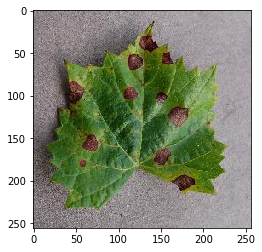

In [42]:
test_image = []
for index, row in mappingval.iterrows():
    img = plt.imread('D:/Projects-Global-Logic/Video-PoC/PlantVillage/PlantVillage/val/' + row.Class+'/'+ row.Image_ID)
    test_image.append(img)
test_img = np.array(test_image)
plt.imshow(img)

In [43]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)
test_image.shape

(200, 224, 224, 3)

In [44]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(test_image.shape[0], 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [45]:
predictions = model.predict_classes(test_image)

In [46]:
y = mappingval.Class
dummy_y  = pd.get_dummies(y)
print(dummy_y.head())
print(dummy_y.shape)

y_valid = dummy_y.values
yorig = y_valid.argmax(1)
output = confusion_matrix(yorig,predictions)
print(output)
print(np.sum(np.diag(output))/np.sum(output))

   Grape___Black_rot  Strawberry___healthy
0                  0                     1
1                  0                     1
2                  0                     1
3                  0                     1
4                  0                     1
(200, 2)
[[108   0]
 [  0  92]]
1.0
